# Sistem Rekomendasi Film dengan TensorFlow
source: https://www.youtube.com/watch?v=6N2vo3JZg2c&list=PL3VpLbLyLE56IVsWwn_rlv9IGGNiyab9e&t=4127s

tahap dalam pembuatan sistem rekomendasi film:
1. Load dataset
2. Pisah data (train dan test)
3. Membuat model
4. Training model
5. Mencoba Model yang Telah Dibuat
5. Menyimpan model

### Import library untuk dataset

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load dataset

In [50]:
ratings = pd.read_csv('ratings.csv')
ratings.sample(5)

,movie_id,user_id,user_rating
93167,113,655,3.0
89654,253,622,3.0
42672,528,494,3.0
70447,284,432,4.0
8441,253,581,5.0


In [51]:
movies = pd.read_csv('movies.csv')
movies.sample(5)

,movie_id,movie_title,movie_genres_str
985,986,Turbulence (1997),['Thriller']
447,448,"Omen, The (1976)",['Film-Noir']
998,999,Clean Slate (1994),"[""Children's""]"
399,400,"Little Rascals, The (1994)","['Animation', ""Children's""]"
752,753,Burnt By the Sun (1994),['Documentary']


jumlah film: 1682
jumlah user: 943

jumlah rating yang diberikan:
5.0    21201
4.0    34174
3.0    27145
2.0    11370
1.0     6110
Name: user_rating, dtype: int64


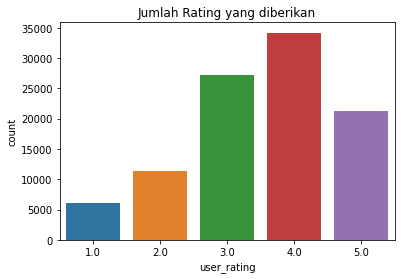

In [52]:
#melihat jumlah film dan user
jml_movie = movies['movie_id'].nunique()
jml_user = ratings['user_id'].nunique()
print("jumlah film:", jml_movie)
print("jumlah user:", jml_user)

#melihat jumlah rating yang diberikan 
sns.countplot(data=ratings, x='user_rating').set_title('Jumlah Rating yang diberikan')
print('\njumlah rating yang diberikan:')
print(ratings['user_rating'].value_counts().sort_index(ascending=False))


informasi: 
- Data film sebanyak 1682 data, dengan 943 user
- Jumlah rating terbanyak adalah 4, dan paling sedikit adalah 1

### 2. Pisah data (train dan test)

In [53]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(ratings, test_size=0.2, random_state=42)

print("jumlah data train:", data_train.shape)
print("jumlah data test :", data_test.shape)

jumlah data train: (80000, 3)
jumlah data test : (20000, 3)


In [54]:
data_train

,movie_id,user_id,user_rating
75220,1016,109,5.0
48955,64,316,4.0
44966,89,200,5.0
13568,174,109,5.0
92727,204,788,3.0
...,...,...,...
6265,125,25,5.0
54886,156,704,3.0
76820,288,422,3.0
860,168,198,4.0


In [55]:
data_test

,movie_id,user_id,user_rating
75721,876,817,4.0
80184,580,83,4.0
19864,393,389,2.0
76699,54,774,1.0
92991,420,712,3.0
...,...,...,...
32595,144,823,5.0
29313,639,339,4.0
37862,222,763,5.0
53421,419,399,3.0


### 3. Membuat Model

dalam tensorflow keras model terdapat input layer, hidden layer, dan output layer

data masuk ke input layer, kemudian diolah oleh hidden layer, dan hasilnya akan keluar dari output layer

hasil yang dikeluarkan oleh output layer adalah nilai prediksi

In [56]:
#import tensorflow keras
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot

#membuat input layer dari movie dan user, ukuran masing-masing input adalah 1
movie_input = Input(shape=[1])
user_input = Input(shape=[1])

#membuat embedding layer untuk movie dan user
#semakin banyak size embedding, semakin banyak informasi yang dapat dikenali oleh model
#semakin banyak size embedding, rawan untuk overfitting
#jika size embedding terlalu kecil, maka model akan menghafalkan data, sarannya jadi itu-itu aja
embedding_size = 40
movie_embedding = Embedding(jml_movie+1, embedding_size)(movie_input)
user_embedding = Embedding(jml_user+1, embedding_size)(user_input)

#membuat flatten layer
#flatten layer bertujuan untuk mengubah bentuk data menjadi 1 dimensi
movie_flatten = Flatten()(movie_embedding)
user_flatten = Flatten()(user_embedding)

#membuat output layer
#output layer bertujuan untuk menghasilkan nilai rating
output = Dot(axes=1)([movie_flatten, user_flatten])

#membuat model
model = Model([movie_input, user_input], output)


In [57]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 1, 40)        67320       ['input_7[0][0]']                
                                                                                                  
 embedding_7 (Embedding)        (None, 1, 40)        37760       ['input_8[0][0]']                
                                                                                            

### 4. Training Model

In [58]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam', loss='mse')

In [59]:
#training model
history = model.fit(x=[data_train.movie_id, data_train.user_id], y=data_train.user_rating, 
                    validation_data=([data_test.movie_id, data_test.user_id], data_test.user_rating),
                    epochs=20, 
                    batch_size=256, 
                    verbose=1)

Epoch 1/20
313/313 [==============================] - 1s 2ms/step - loss: 13.3495 - val_loss: 11.1452
Epoch 2/20
313/313 [==============================] - 1s 2ms/step - loss: 5.3946 - val_loss: 2.0376
Epoch 3/20
313/313 [==============================] - 1s 2ms/step - loss: 1.4793 - val_loss: 1.1958
Epoch 4/20
313/313 [==============================] - 1s 2ms/step - loss: 1.0605 - val_loss: 1.0140
Epoch 5/20
313/313 [==============================] - 1s 2ms/step - loss: 0.9425 - val_loss: 0.9521
Epoch 6/20
313/313 [==============================] - 1s 2ms/step - loss: 0.8931 - val_loss: 0.9275
Epoch 7/20
313/313 [==============================] - 1s 2ms/step - loss: 0.8655 - val_loss: 0.9114
Epoch 8/20
313/313 [==============================] - 1s 2ms/step - loss: 0.8442 - val_loss: 0.9001
Epoch 9/20
313/313 [==============================] - 1s 2ms/step - loss: 0.8250 - val_loss: 0.8908
Epoch 10/20
313/313 [==============================] - 1s 2ms/step - loss: 0.8071 - val_loss: 0.88

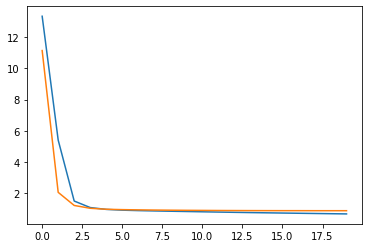

In [60]:
import matplotlib.pyplot as plt
losses = pd.DataFrame(history.history)
plt.plot(losses)

In [65]:
#evaluasi model
model.evaluate([data_test.movie_id, data_test.user_id], data_test.user_rating)

625/625 [==============================] - 1s 1ms/step - loss: 0.8584


0.8584487438201904

In [79]:
#melihat beberapa perbandingan nilai rating yang sebenarnya dan nilai rating yang diprediksi
prediksi = model.predict([data_test.movie_id, data_test.user_id])
prediksi = prediksi.reshape(-1)
prediksi = pd.DataFrame(prediksi, columns=['prediksi'])
prediksi['user_rating'] = data_test['user_rating'].values
prediksi['selisih'] = prediksi['prediksi'] - prediksi['user_rating']
prediksi.sample(20)

625/625 [==============================] - 1s 852us/step


,prediksi,user_rating,selisih
12009,4.805668,5.0,-0.194332
4891,4.324365,5.0,-0.675635
18241,3.462663,2.0,1.462663
1366,4.521601,4.0,0.521601
13312,3.870317,5.0,-1.129683
6340,3.578136,4.0,-0.421864
12085,4.173173,5.0,-0.826827
2600,5.100503,5.0,0.100503
9552,3.653144,2.0,1.653144
1563,0.978603,1.0,-0.021397


### 5. Mencoba Model yang Telah Dibuat

In [84]:
def get_recommendations(user_id, movies, model):
  movies = movies.copy()
  user_ids = np.array([user_id] * len(movies))
  results = model([movies['movie_id'].values, user_ids]).numpy().reshape(-1)

  movies['predicted_rating'] = pd.Series(results)
  movies = movies.sort_values('predicted_rating', ascending=False)

  print(f'rekomendasi untuk user {user_id}')
  return movies

get_recommendations(712, movies, model).head(10)

rekomendasi untuk user 712


,movie_id,movie_title,movie_genres_str,predicted_rating
142,143,"Sound of Music, The (1965)",['Musical'],4.990651
120,121,Independence Day (ID4) (1996),"['unknown', 'Sci-Fi', 'Western']",4.939096
401,402,Ghost (1990),"[""Children's"", 'Romance', 'Thriller']",4.935175
391,392,"Man Without a Face, The (1993)",['Documentary'],4.919121
65,66,While You Were Sleeping (1995),"[""Children's"", 'Romance']",4.859806
719,720,First Knight (1995),"['unknown', 'Action', 'Documentary', 'Romance']",4.764417
691,692,"American President, The (1995)","[""Children's"", 'Documentary', 'Romance']",4.763218
965,966,"Affair to Remember, An (1957)",['Romance'],4.754288
738,739,Pretty Woman (1990),"[""Children's"", 'Romance']",4.748395
70,71,"Lion King, The (1994)","['Adventure', 'Animation', 'Musical']",4.713131


### 6. Menyimpan Model

simpan model dengan format .h5

In [85]:
model.save('model.h5')

simpan model dengan format .json,
jika gagal coba jalankan di google colaboratory

In [ ]:
# !pip install tensorflowjs
# !tensorflowjs_converter --input_format=keras ./model.h5 ./tfjs_model

In [ ]:
'''
from zipfile import ZipFile
import os

with ZipFile('tfjs_model.zip', 'w') as z:
  for filename in os.listdir('tfjs_model'): 
    filepath = os.path.join('tfjs_model', filename)
    z.write(filepath)

'''